In [1]:
#get all the neccessary imports
import pandas as pd
import numpy as np

import acquire
import prepare

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import scipy.stats as stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
#for visibility of all columns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [3]:
#acquire data using acquire.py
telco= acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
#shape of data
telco.shape

(7043, 24)

In [5]:
#check for duplicates
telco.duplicated().sum()

0

In [57]:
#check for datatypes
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
#check for categorical data
telco.nunique()

payment_type_id                4
internet_service_type_id       3
contract_type_id               3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
contract_type                  3
internet_service_type          3
payment_type                   4
dtype: int64

In [8]:
#do value counts on all columns
for col in telco.columns:
    print (telco[col].value_counts())
    print()

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: senior_citizen, dtype: int64

No     3641
Yes    3402
Name: partner, dtype: int64

No     4933
Yes    2110
Name: dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: phone_service, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

No           

In [58]:
#total charge column is string type and has 11 spaces filled up with blanks.
#the tenure associated with them is 0
#this implies they just signed up
#we can replace those blancks with 0
telco[telco.total_charges == " "].tenure

945     0
1731    0
1906    0
2025    0
2176    0
2250    0
2855    0
3052    0
3118    0
4054    0
5433    0
Name: tenure, dtype: int64

In [7]:
telco.total_charges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

In [1]:
telco[telco.total_charges == " "].monthly_charges

NameError: name 'telco' is not defined

In [64]:
telco[telco.tenure == 1].head(15)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
17,1,2,1,0021-IKXGC,Female,1,No,No,1,Yes,Yes,No,No,No,No,No,No,Yes,72.10,72.1,No,Month-to-month,Fiber optic,Electronic check
19,1,1,1,0023-HGHWL,Male,1,No,No,1,No,No phone service,No,No,No,No,No,No,Yes,25.10,25.1,Yes,Month-to-month,DSL,Electronic check
25,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,Yes,No,No,No,No,No,No,30.50,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)
48,2,1,1,0082-LDZUE,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,Yes,44.30,44.3,No,Month-to-month,DSL,Mailed check
63,1,3,1,0107-WESLM,Male,0,No,No,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,Month-to-month,None,Electronic check
64,1,2,1,0107-YHINA,Male,0,No,Yes,1,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,99.75,99.75,Yes,Month-to-month,Fiber optic,Electronic check
86,2,2,1,0137-OCGAB,Female,0,No,No,1,Yes,Yes,No,Yes,No,No,No,No,Yes,80.20,80.2,Yes,Month-to-month,Fiber optic,Mailed check
93,2,2,1,0151-ONTOV,Female,0,No,No,1,Yes,No,No,No,No,No,No,No,No,70.90,70.9,Yes,Month-to-month,Fiber optic,Mailed check
139,1,2,1,0231-LXVAP,Male,0,No,No,1,Yes,No,No,No,No,Yes,No,No,Yes,75.90,75.9,Yes,Month-to-month,Fiber optic,Electronic check
142,4,2,1,0235-KGSLC,Female,0,No,No,1,Yes,No,No,No,Yes,No,Yes,No,Yes,85.55,85.55,Yes,Month-to-month,Fiber optic,Credit card (automatic)


In [10]:
# replace the empty space in total charges with 0 
#convert the column to a float
telco.total_charges = telco.total_charges.str.replace(' ', '0')
telco.total_charges = telco.total_charges.astype(float)

In [12]:
#peek at numerical columns
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.00,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.00,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.00,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [13]:
#run cross tab to see relationship to check 
pd.crosstab(telco.contract_type, telco.contract_type_id)

contract_type_id,1,2,3
contract_type,,,
Month-to-month,3875,0,0
One year,0,1473,0
Two year,0,0,1695


In [14]:
#we can drop one of these, we will drop contract_type_id

In [15]:
pd.crosstab(telco.internet_service_type_id, telco.internet_service_type)

internet_service_type,DSL,Fiber optic,None
internet_service_type_id,,,
1,2421,0,0
2,0,3096,0
3,0,0,1526


In [16]:
#we can drop of these too

In [17]:
pd.crosstab(telco.payment_type_id, telco.payment_type)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
payment_type_id,,,,
1,0,0,2365,0
2,0,0,0,1612
3,1544,0,0,0
4,0,1522,0,0


In [18]:
# we will drop the duplicates
telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [19]:
#we can encode categorical columns with dummy variables and concatenate them to our dataframe
telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})

In [20]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1


In [21]:
#for other non binary categorical columns, use dummies
non_binary = ['multiple_lines','online_security','online_backup','device_protection','tech_support',\
               'streaming_tv','streaming_movies','contract_type', 'internet_service_type', 'payment_type']


dummy_telco = pd.get_dummies(telco[non_binary],drop_first=True)

In [22]:
dummy_telco.head()

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [23]:
#concatenate telco with dummy_telco
telco= pd.concat([telco,dummy_telco],axis = 1)
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [24]:
#drop original columns that we created dummies out off
#telco = telco.drop(columns = non_binary)
#telco.head()

In [25]:
#also dropped the original encoded column except churn as it is the target
#encoded_col = ["gender","partner","dependents","phone_service","paperless_billing"]
#telco = telco.drop(columns = encoded_col)
#telco.head()

In [26]:
#check column names for clean up
telco.columns.tolist()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet

In [27]:
#clean up column names
telco.columns = telco.columns.str.lower().str.replace(" ","_").str.replace("[(,)]","",regex =True)
telco.columns.tolist()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_no_phone_service',
 'multiple_lines_yes',
 'online_security_no_internet_service',
 'online_security_yes',
 'online_backup_no_internet_service',
 'online_backup_yes',
 'device_protection_no_internet_service',
 'device_protection_yes',
 'tech_support_no_internet_service',
 'tech_support_yes',
 'streaming_tv_no_internet_service',
 'streaming_tv_yes',
 'streaming_movies_no_internet_service',
 'streaming_movies_yes',
 'contract_type_one_year',
 'contract_type_two_year',
 'internet

In [28]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no_internet_service,online_security_yes,online_backup_no_internet_service,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [29]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [30]:
telco.shape

(7043, 48)

In [31]:
#test
telco1 = acquire.get_telco_data()
telco1=prepare.clean_telco_data(telco1)

In [32]:
telco1.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no_internet_service,online_security_yes,online_backup_no_internet_service,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1


In [33]:
telco1.shape

(7043, 48)

since telco and telco1 have same shape, the clean_telco_data function works correctly

In [35]:
#telco1.columns.tolist()

In [34]:
#make the function for split
def my_train_test_split_telco(telco):

     train, test = train_test_split(telco, test_size=.2, random_state=123, stratify=telco.churn)
     train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train.churn)

     return train, validate, test 

In [6]:
#make prep function 
def prep_telco_data(telco):
    telco = clean_data_telco(telco)
    train, validate, test = my_train_test_split_telco_telco(telco)
    return train,validate,test

In [9]:
#test out the prepare 
train,validate,test = prepare.prep_telco_data(telco)

In [10]:
#explore 
train.shape,validate.shape,test.shape

((4225, 48), (1409, 48), (1409, 48))

In [6]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no_internet_service,online_security_yes,online_backup_no_internet_service,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,No,No,Yes,No,Yes,39.95,1023.75,No,One year,DSL,Bank transfer (automatic),0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,26.90,1250.85,No,One year,None,Electronic check,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,Yes,No,No,No,Yes,50.45,50.45,Yes,Month-to-month,DSL,Mailed check,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,No,Yes,Yes,Yes,Yes,60.05,4176.70,No,Two year,DSL,Bank transfer (automatic),0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,No,No,Yes,Yes,No,87.55,4475.90,No,One year,Fiber optic,Credit card (automatic),1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0


# EDA

Univariate Exploration

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   gender                                 4225 non-null   object 
 2   senior_citizen                         4225 non-null   int64  
 3   partner                                4225 non-null   object 
 4   dependents                             4225 non-null   object 
 5   tenure                                 4225 non-null   int64  
 6   phone_service                          4225 non-null   object 
 7   multiple_lines                         4225 non-null   object 
 8   online_security                        4225 non-null   object 
 9   online_backup                          4225 non-null   object 
 10  device_protection                      4225 non-null   object 
 11  t

tenure, monthly charge and total charges are the only continous variable

In [7]:
#make list of all continous variables
continous_var = ["tenure","monthly_charges","total_charges"]

In [8]:
train[continous_var].describe()

,tenure,monthly_charges,total_charges
count,4225.000000,4225.000000,4225.000000
mean,32.500828,65.056142,2298.513598
std,24.532563,30.268493,2271.603284
min,0.000000,18.250000,0.000000
25%,9.000000,35.650000,411.600000
50%,29.000000,70.400000,1401.150000
75%,55.000000,90.150000,3865.450000
max,72.000000,118.750000,8672.450000


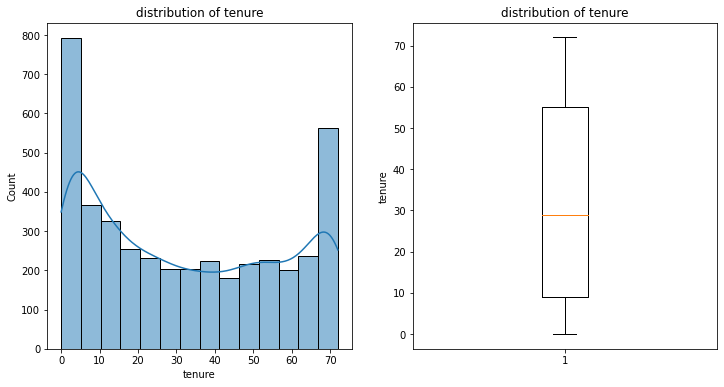

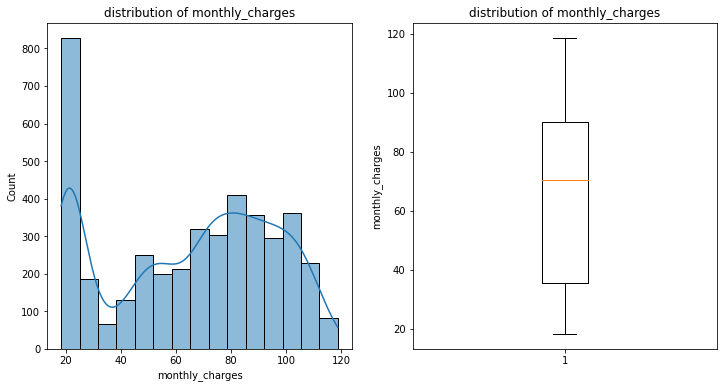

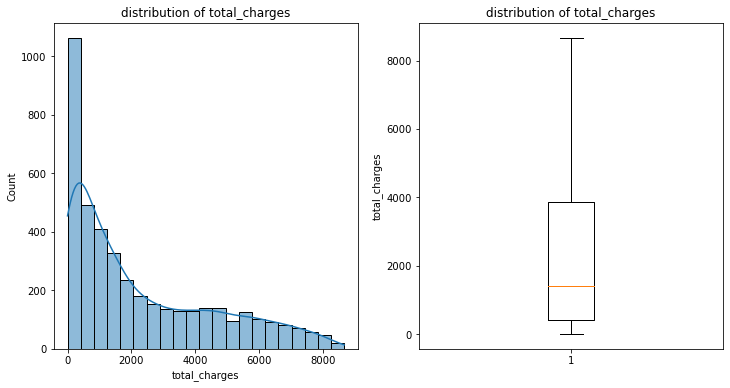

In [15]:
#lets visualize how our continous variables are behaving

for col in train[continous_var]:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    plt.title("distribution of " + col)
    sns.histplot(train[col], kde=True)
    
    plt.subplot(1,2,2)
    plt.title("distribution of " + col)
    plt.boxplot(train[col])
    plt.ylabel(col)
    plt.show()
    

    
## Takeaways

on average, customers are in thier 32 month

monthly charge ranges from $18 to $118, on average they pay $65 monthly

total charge ranges from 0 to $8672

In [25]:
#relationship between total charges, monthly charges and tenure
#lets gets product of tenure and monthly charge and compare with total charge
product_tenure_monthly_charge = train.tenure * train.monthly_charges

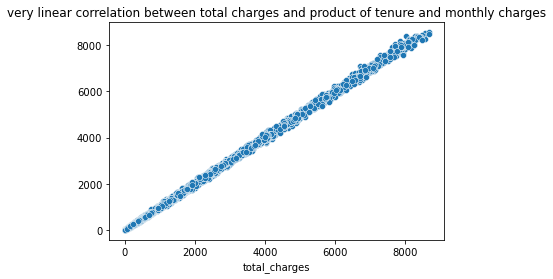

In [26]:
#lets make a graph
plt.title("very linear correlation between total charges and product of tenure and monthly charges")
sns.scatterplot(x = train.total_charges,y = product_tenure_monthly_charge)
plt.show()

## Takeaway

this relation is very strong. we can drop the total charge column from our potential feature

Lets looks at some categorical variables now

In [27]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_encoded', 'partner_encoded',
       'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_no_phone_service', 'multiple_lines_yes',
       'online_security_no_internet_service', 'online_security_yes',
       'online_backup_no_internet_service', 'online_backup_yes',
       'device_protection_no_internet_service', 'device_protection_yes',
       'tech_support_no_internet_service', 'tech_support_yes',
       'streaming_tv_no_internet_service', 'streaming_tv_yes',
       'streaming_movies_no_internet_service', 'streaming_movies_yes',


In [7]:
categorical_var = ['churn','gender','senior_citizen','partner','dependents','phone_service','paperless_billing','multiple_lines','online_security','online_backup','device_protection','tech_support',
               'streaming_tv','streaming_movies','contract_type', 'internet_service_type', 'payment_type']

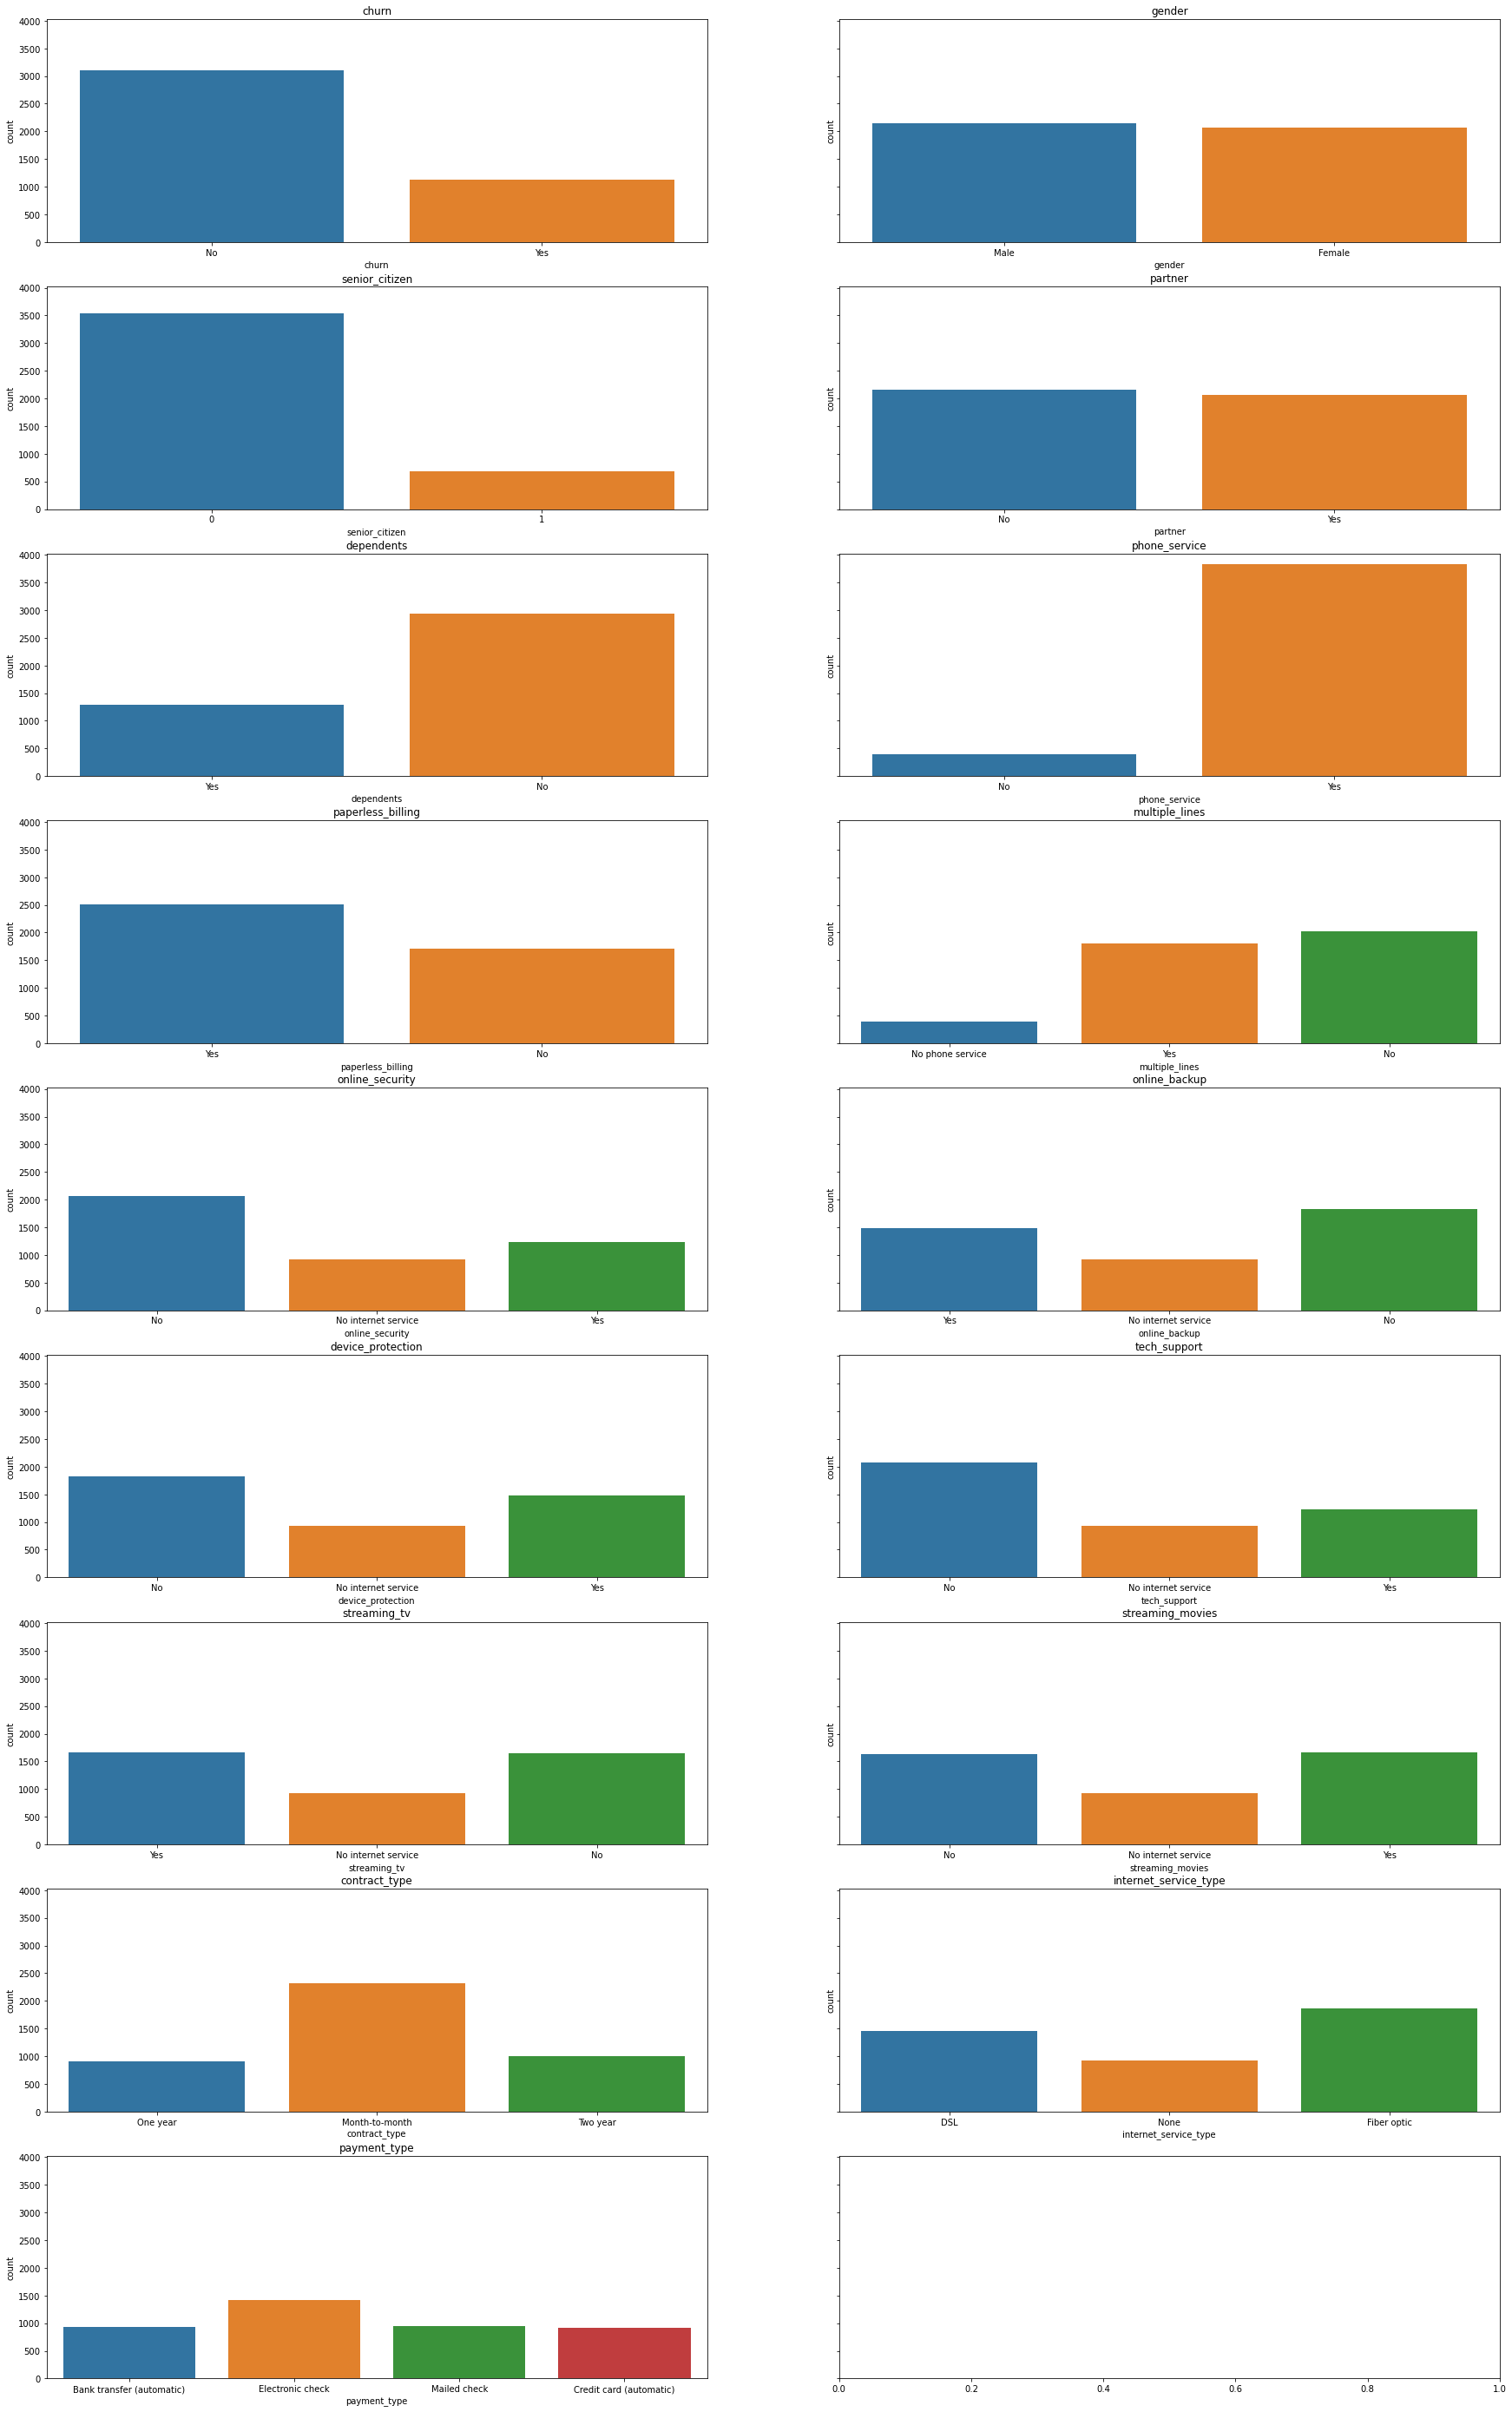

In [8]:
_, ax = plt.subplots(nrows=9, ncols=2, figsize=(30, 50), sharey=True)
for i, col in enumerate(train[categorical_var]):
    ax = ax.flatten()
    sns.countplot(x = col, data=train, ax=ax[i])
    ax[i].set_title(col)  

In [ ]:
Takeaways:
    


In [44]:
#for col in train[categorical_var]:
def cat_viz(train,col):
    plt.title("relationship of churn and " + col)
    sns.countplot(hue = col, x = "churn", data = train)
    plt.legend(loc="upper right")
    plt.show()

    
def cat_test(train, col):
    alpha = 0.05
    null_hyp = col+' and churn rate are independent'
    alt_hyp = 'There is a relationship between churn rate and '+col
    observed = pd.crosstab(train.churn, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between churn rate and '+col)

def cat_analysis(train, col):
    cat_viz(train, col)
    cat_test(train, col)


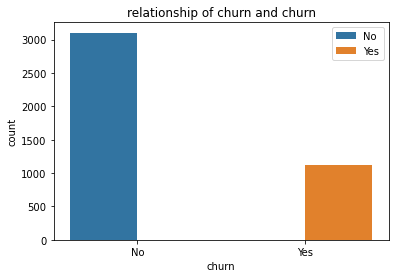

We reject the null hypothesis that churn and churn rate are independent
There is a relationship between churn rate and churn


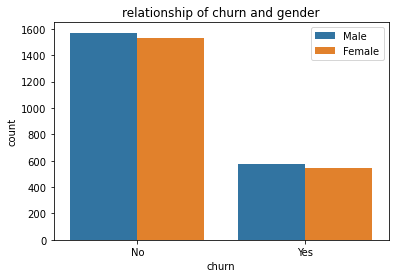

We fail to reject the null hypothesis that gender and churn rate are independent
There appears to be no relationship between churn rate and gender


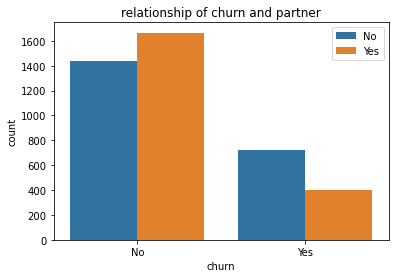

We reject the null hypothesis that partner and churn rate are independent
There is a relationship between churn rate and partner


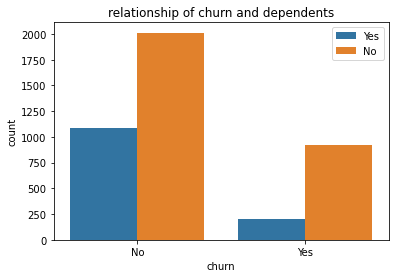

We reject the null hypothesis that dependents and churn rate are independent
There is a relationship between churn rate and dependents


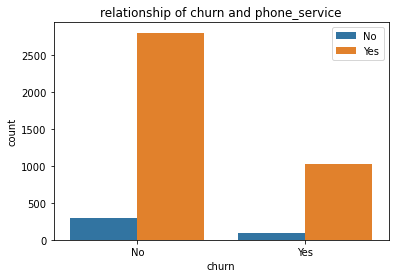

We fail to reject the null hypothesis that phone_service and churn rate are independent
There appears to be no relationship between churn rate and phone_service


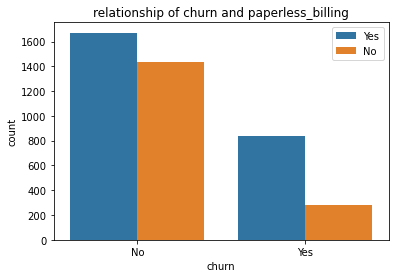

We reject the null hypothesis that paperless_billing and churn rate are independent
There is a relationship between churn rate and paperless_billing


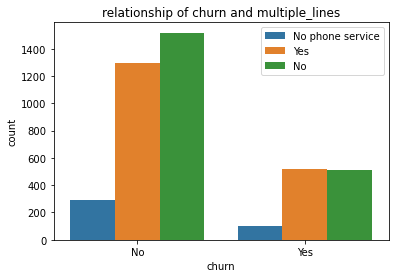

We reject the null hypothesis that multiple_lines and churn rate are independent
There is a relationship between churn rate and multiple_lines


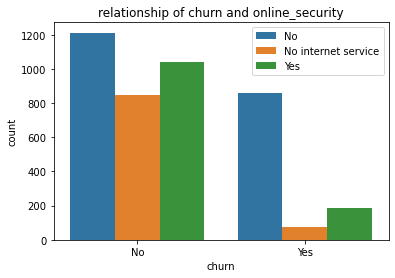

We reject the null hypothesis that online_security and churn rate are independent
There is a relationship between churn rate and online_security


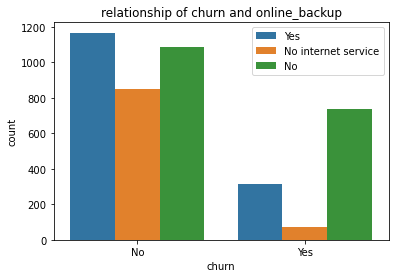

We reject the null hypothesis that online_backup and churn rate are independent
There is a relationship between churn rate and online_backup


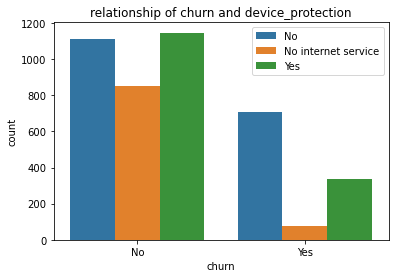

We reject the null hypothesis that device_protection and churn rate are independent
There is a relationship between churn rate and device_protection


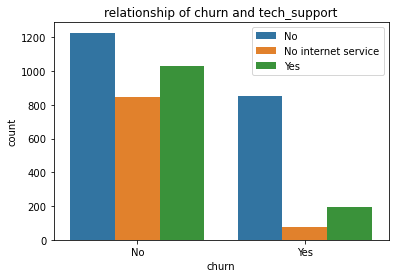

We reject the null hypothesis that tech_support and churn rate are independent
There is a relationship between churn rate and tech_support


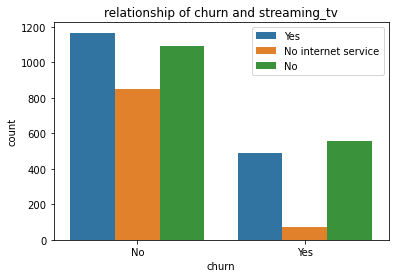

We reject the null hypothesis that streaming_tv and churn rate are independent
There is a relationship between churn rate and streaming_tv


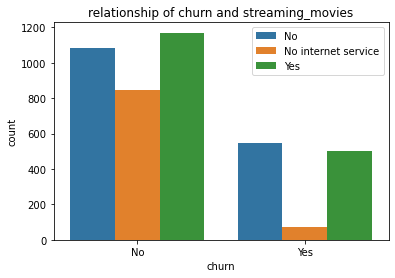

We reject the null hypothesis that streaming_movies and churn rate are independent
There is a relationship between churn rate and streaming_movies


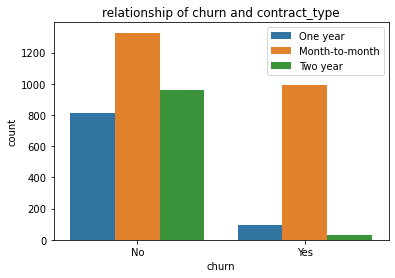

We reject the null hypothesis that contract_type and churn rate are independent
There is a relationship between churn rate and contract_type


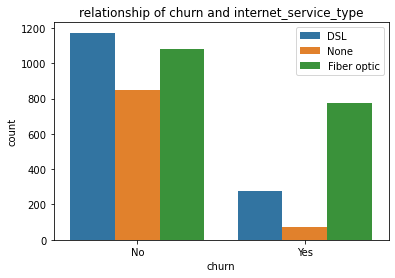

We reject the null hypothesis that internet_service_type and churn rate are independent
There is a relationship between churn rate and internet_service_type


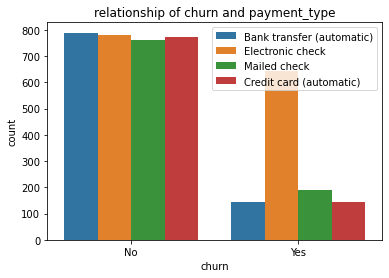

We reject the null hypothesis that payment_type and churn rate are independent
There is a relationship between churn rate and payment_type


In [45]:
for col in categorical_var:
    cat_analysis(train, col)

#categories to investigate:
senior
partner_encoded
dep
online security no internet service
online security yes
online back up no internet service
device protection no internet service
tech support no internet service
tech support yes
streaming tv no internet service
streaming movies no internet service
contract type one year
contract type two year
internet service type
payment type electronic check
billing

what about continous variable?
lets see how tenure, monthly charge, total charge relate with each other

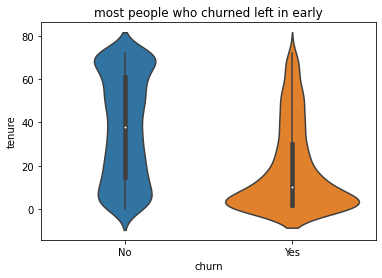

In [67]:
numeric_var = ["tenure","monthly_charges","total_charges"]
plt.title("most people who churned left in early")
sns.violinplot(x = "churn",y = "tenure", data = train)
plt.show()

most people who churned left in early

In [12]:
#H0: no difference in tenure of people who churned and who did not
#H1: difference in tenure of people who churned and who did not
train_yes_churn_tenure= train[train.churn == "Yes"].tenure
train_no_churn_tenure= train[train.churn == "No"].tenure
t,p =stats.mannwhitneyu(train_yes_churn_tenure,train_no_churn_tenure)
t,p

(911180.5, 5.517423526326908e-124)

In [ ]:
#p<0.5, reject Ho
#there is difference in tenure of people who churned and who did not

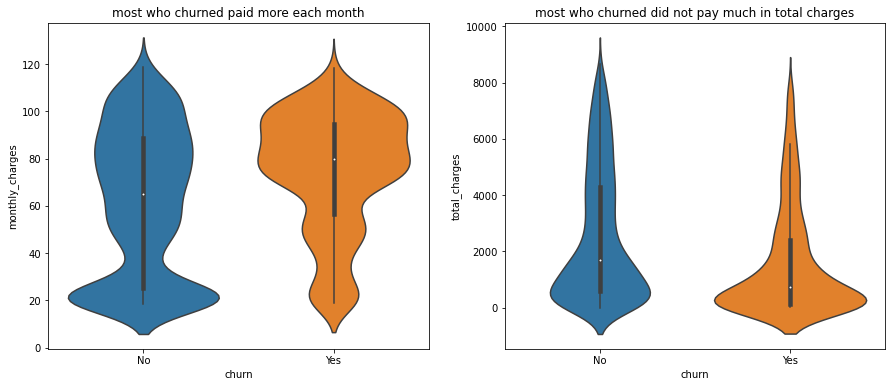

In [141]:
numeric_var = ["tenure","monthly_charges","total_charges"]

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title("most who churned paid more each month")
sns.violinplot(x = "churn",y = "monthly_charges", data = train)

plt.subplot(1,2,2)
plt.title("most who churned did not pay much in total charges")
sns.violinplot(x = "churn",y = "total_charges", data = train)
plt.show()




most who churned paid more each month

most who churned did not pay much in total charges, which may be due to tenure as they left in early months


In [124]:
#H0: no difference in monthly charges of people who churned and who did not
#H1: difference in monthly charge of people who churned and who did not
train_yes_churn= train[train.churn_encoded == 1].monthly_charges
train_no_churn= train[train.churn_encoded == 0].monthly_charges
t,p =stats.mannwhitneyu(train_yes_churn,train_no_churn)
t,p

(2150281.0, 9.335064744398014e-32)

In [ ]:
#p<0.5, reject Ho
#there is difference in monthly charge of people who churned and who did not

In [125]:
#H0: no difference in total charges of people who churned and who did not
#H1: difference in total charge of people who churned and who did not
train_yes_churn= train[train.churn_encoded == 1].total_charges
train_no_churn= train[train.churn_encoded == 0].total_charges
t,p =stats.mannwhitneyu(train_yes_churn,train_no_churn)
t,p

(1225767.0, 8.156172948241676e-49)

In [ ]:
#p<0.5, reject Ho
#there is difference in total charge of people who churned and who did not, but we are not 

Feature engineering

In [8]:
train["added_services"] = (train[['phone_service','multiple_lines','online_security','online_backup',
                                  'device_protection','tech_support',
               'streaming_tv','streaming_movies']] == "Yes").sum(axis =1 )
train["added_services"].head()

5911    2
2479    2
5889    2
6087    5
785     3
Name: added_services, dtype: int64

In [11]:
train1 =train[["added_services","churn"]]
train1

,added_services,churn
5911,2,No
2479,2,No
5889,2,Yes
6087,5,No
785,3,No
...,...,...
6102,3,Yes
356,4,No
1756,1,Yes
2127,3,No


In [37]:
train1.groupby([ "added_services"])["churn"].value_counts(normalize = True).mul(100)

added_services  churn
0               Yes      51.351351
                No       48.648649
1               No       78.362573
                Yes      21.637427
2               No       67.099567
                Yes      32.900433
3               No       65.734266
                Yes      34.265734
4               No       68.113208
                Yes      31.886792
5               No       73.767606
                Yes      26.232394
6               No       76.959620
                Yes      23.040380
7               No       86.614173
                Yes      13.385827
8               No       94.354839
                Yes       5.645161
Name: churn, dtype: float64

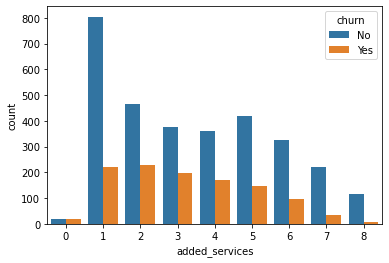

In [7]:
sns.countplot(x= train.added_services, hue = train.churn)
plt.show()

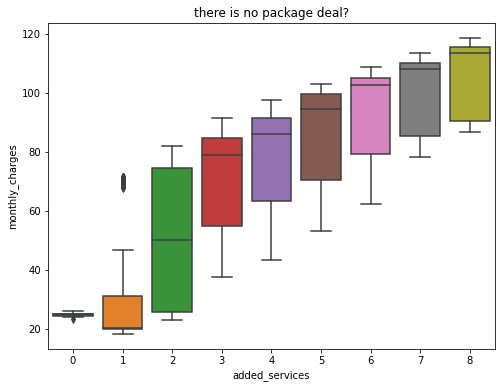

In [10]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "added_services", y = "monthly_charges", data = train)
plt.title("there is no package deal?")
plt.show()

In [8]:
# high churn rate with one only one additonal services

In [7]:
train["dependent_and_partner"] = (train[["dependents", "partner"]] == "Yes").sum(axis =1)

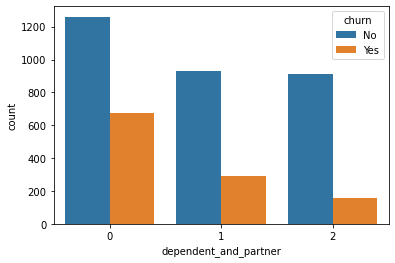

In [10]:
sns.countplot(x= train.dependent_and_partner, hue = train.churn)
plt.show()

In [15]:
#higher churn rate among having 0 to 2 dependent or partner

In [16]:
train.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_encoded', 'partner_encoded',
       'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_no_phone_service', 'multiple_lines_yes',
       'online_security_no_internet_service', 'online_security_yes',
       'online_backup_no_internet_service', 'online_backup_yes',
       'device_protection_no_internet_service', 'device_protection_yes',
       'tech_support_no_internet_service', 'tech_support_yes',
       'streaming_tv_no_internet_service', 'streaming_tv_yes',
       'streaming_movies_no_internet_service', 'streaming_movies_yes',


In [17]:
train.groupby(by = "added_services").monthly_charges.mean()

added_services
0     24.805405
1     30.002778
2     50.736219
3     69.251486
4     78.400566
5     86.115757
6     93.560451
7    100.121457
8    105.674597
Name: monthly_charges, dtype: float64

In [1]:
sns.boxplot(x = "added_services", y = "monthly_charges", data = train)

NameError: name 'sns' is not defined

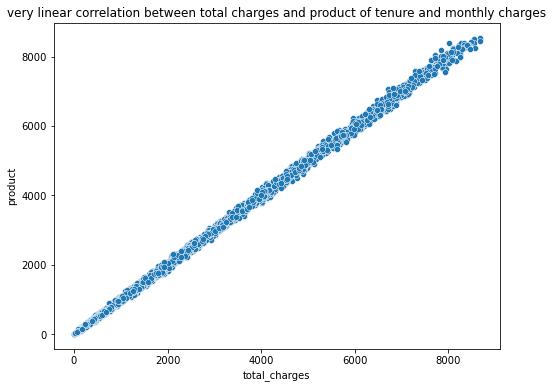

In [8]:
#relationship between total charges, monthly charges and tenure
#lets gets product of tenure and monthly charge and compare with total charge
train["product"]= train['tenure'] * train['monthly_charges']
train.head(1)

#plot the relation
plt.figure(figsize = (8,6))
plt.title("very linear correlation between total charges and product of tenure and monthly charges")
sns.scatterplot(x ='total_charges', y= 'product', data = train)
plt.show()

In [32]:
train[(train.tenure < 20 ) & (train.added_services == 7)].monthly_charges.mean()

101.33000000000001

In [34]:
train[(train.tenure < 20 ) & (train.added_services == 6)].monthly_charges.mean()

91.99512195121949

In [35]:
train[(train.tenure < 20 ) & (train.added_services == 5)].monthly_charges.mean()

89.47455357142856

In [36]:
train[(train.tenure < 20 ) & (train.added_services == 4)].monthly_charges.mean()

81.21893203883496

In [37]:
train[(train.tenure < 20 ) & (train.added_services == 3)].monthly_charges.mean()

72.07045454545455

In [38]:
train[(train.tenure < 20 ) & (train.added_services == 2)].monthly_charges.mean()

59.63272727272729

In [39]:
train[(train.tenure < 20 ) & (train.added_services == 1)].monthly_charges.mean()

34.433788121990354

In [27]:
train[(train.tenure < 20 ) & (train.added_services == 0)].monthly_charges.mean()

24.738333333333337

In [33]:
a =train[(train.tenure < 20)].monthly_charges

In [37]:
c =train.monthly_charges.mean()

In [34]:
b = train[(train.tenure > 20)].monthly_charges

In [36]:
tstat, p = stats.ttest_ind(a,b)
tstat, p

(-14.041041518195243, 8.553065830721376e-44)

In [38]:
tstat,p = stats.ttest_1samp(a,c)
tstat,p

(-11.712280267784475, 1.6165143333485637e-30)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   gender                                 4225 non-null   object 
 2   senior_citizen                         4225 non-null   int64  
 3   partner                                4225 non-null   object 
 4   dependents                             4225 non-null   object 
 5   tenure                                 4225 non-null   int64  
 6   phone_service                          4225 non-null   object 
 7   multiple_lines                         4225 non-null   object 
 8   online_security                        4225 non-null   object 
 9   online_backup                          4225 non-null   object 
 10  device_protection                      4225 non-null   object 
 11  t

In [50]:
train_numeric_values = train.select_dtypes(exclude=['object'])
correlation = train_numeric_values.corr()
correlation["churn_encoded"].sort_values(ascending = False)

churn_encoded                            1.000000
internet_service_type_fiber_optic        0.303352
payment_type_electronic_check            0.301090
monthly_charges                          0.188467
paperless_billing_encoded                0.188077
senior_citizen                           0.139013
streaming_movies_yes                     0.063197
streaming_tv_yes                         0.056389
multiple_lines_yes                       0.038528
phone_service_encoded                    0.011578
gender_encoded                          -0.008381
multiple_lines_no_phone_service         -0.011578
device_protection_yes                   -0.063436
added_services                          -0.065474
payment_type_mailed_check               -0.080974
online_backup_yes                       -0.090380
payment_type_credit_card_automatic      -0.128428
tech_support_yes                        -0.153070
partner_encoded                         -0.159401
online_security_yes                     -0.162633


Modeling

In [66]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_no_phone_service,multiple_lines_yes,online_security_no_internet_service,online_security_yes,online_backup_no_internet_service,online_backup_yes,device_protection_no_internet_service,device_protection_yes,tech_support_no_internet_service,tech_support_yes,streaming_tv_no_internet_service,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check,added_services,dependent_and_partner
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,No,No,Yes,No,Yes,39.95,1023.75,No,One year,DSL,Bank transfer (automatic),0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,26.90,1250.85,No,One year,None,Electronic check,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,2,1
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,Yes,No,No,No,Yes,50.45,50.45,Yes,Month-to-month,DSL,Mailed check,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,No,Yes,Yes,Yes,Yes,60.05,4176.70,No,Two year,DSL,Bank transfer (automatic),0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,5,0
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,No,No,Yes,Yes,No,87.55,4475.90,No,One year,Fiber optic,Credit card (automatic),1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,3,0


In [9]:
train.shape


(4225, 51)

In [ ]:
contract type, payment type, online security, tech support, tenure, monthly charge,senior citizen, internet service type

In [11]:
encoded_features =['contract_type_one_year', 'contract_type_two_year','payment_type_mailed_check','payment_type_credit_card_automatic', 'payment_type_electronic_check', 'internet_service_type_none', 'online_security_no_internet_service', 'online_security_yes',
                  'tech_support_no_internet_service','tech_support_yes', 'tech_support_yes','tenure','monthly_charges', 'senior_citizen','internet_service_type_fiber_optic'] 

In [12]:
# X is going to be our entire domain, indepedent variables, minus the target variable
# y is going to be our target variable, the dependent thing that we are using X to predict

X_train = train[encoded_features]
y_train = train.churn_encoded
X_validate = validate[encoded_features]
y_validate = validate.churn_encoded
X_test = test[encoded_features]
y_test = test.churn_encoded

In [12]:
X_train.head()

,contract_type_one_year,contract_type_two_year,payment_type_mailed_check,payment_type_credit_card_automatic,payment_type_electronic_check,internet_service_type_none,online_security_no_internet_service,online_security_yes,tech_support_no_internet_service,tech_support_yes,tech_support_yes,tenure,monthly_charges,senior_citizen,internet_service_type_fiber_optic
5911,1,0,0,0,0,0,0,0,0,0,0,26,39.95,0,0
2479,1,0,0,0,1,1,1,0,1,0,0,47,26.90,0,0
5889,0,0,1,0,0,0,0,0,0,0,0,1,50.45,0,0
6087,0,1,0,0,0,0,0,1,0,1,1,69,60.05,0,0
785,1,0,0,1,0,0,0,0,0,0,0,51,87.55,0,1


In [28]:
# baseline prediction: baseline is the mode value
y_train.value_counts()

0    3104
1    1121
Name: churn_encoded, dtype: int64

In [29]:
# baseline prediction
(y_train == 0).mean()
print(f'Our baseline accuracy for churn in all cases on the Titanic Dataset is {(y_train == 0).mean():.3}')


Our baseline accuracy for churn in all cases on the Titanic Dataset is 0.735


Decision tree

In [13]:
#loop the model with changing max depth only
model_scores = []
for i in range(1,15):
    model = DecisionTreeClassifier(max_depth=i, random_state =123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"i":i, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    model_scores.append(output)
df = pd.DataFrame(model_scores)
df

,i,accuracy_train,accuracy_validate,difference
0,1,0.734675,0.734564,0.000111
1,2,0.786982,0.792761,-0.005779
2,3,0.786982,0.792761,-0.005779
3,4,0.791716,0.804116,-0.012400
4,5,0.802130,0.793471,0.008660
5,6,0.812308,0.794180,0.018127
6,7,0.821538,0.793471,0.028068
7,8,0.834556,0.772179,0.062377
8,9,0.850414,0.775018,0.075396
9,10,0.868876,0.762243,0.106633


In [ ]:
#model when i = 5 seems to our best one

In [9]:
#tune model with min sample spit 
model_scores = []
for i in range(2,10):
    model = DecisionTreeClassifier(max_depth=i, min_samples_split=3, random_state =123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"i":i, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    model_scores.append(output)
df = pd.DataFrame(model_scores)
df

,i,accuracy_train,accuracy_validate,difference
0,2,0.786982,0.792761,-0.005779
1,3,0.786982,0.792761,-0.005779
2,4,0.791716,0.804116,-0.012400
3,5,0.802130,0.793471,0.008660
4,6,0.812308,0.794180,0.018127
5,7,0.821302,0.794180,0.027122
6,8,0.833846,0.773598,0.060248
7,9,0.848994,0.777857,0.071137


In [10]:
#looks like model 5 is the best model

In [11]:
#create decision tree classifier 
model5 = DecisionTreeClassifier(max_depth=5, random_state=123)

#fit the random forest algorithm to the training data.
model5= model5.fit(X_train, y_train)

## make prediction on train obeservations
y_pred = model5.predict(X_train)


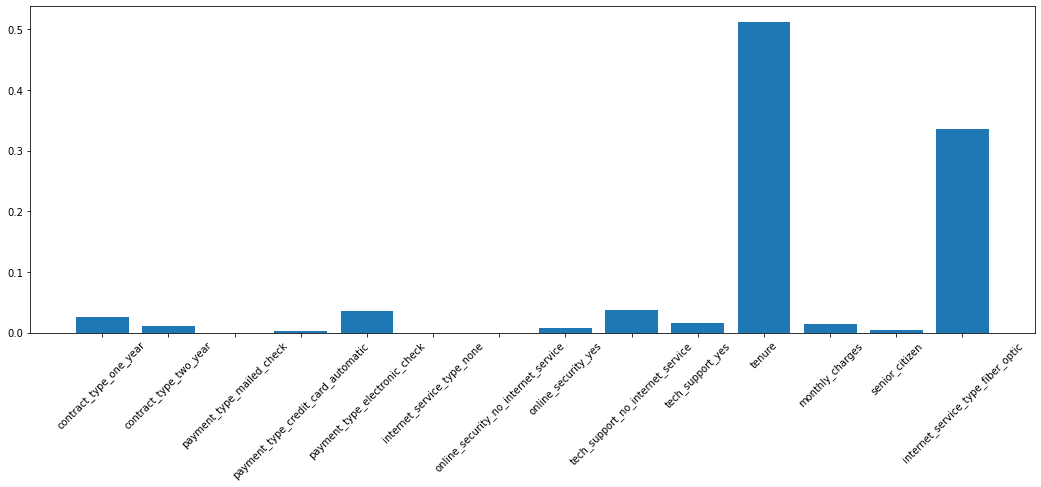

In [12]:
#make it in bar graph for good visual against the train columns
plt.figure(figsize = (18,6))
plt.bar(X_train.columns, model5.feature_importances_)
plt.xticks(rotation = 45)
plt.show()

Random forest

In [12]:
#model with tuning min sample leaf only
model_scores = []

for i in range(1,30):

    model = RandomForestClassifier(min_samples_leaf= i,random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"min_sample_leaf":i, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    model_scores.append(output)
df = pd.DataFrame(model_scores)
df

,min_sample_leaf,accuracy_train,accuracy_validate,difference
0,1,0.994320,0.786373,0.207946
1,2,0.909822,0.803407,0.106416
2,3,0.872426,0.801987,0.070439
3,4,0.855148,0.797729,0.057419
4,5,0.843787,0.798439,0.045348
5,6,0.833136,0.808375,0.024761
6,7,0.829822,0.802697,0.027126
7,8,0.822959,0.804116,0.018842
8,9,0.817515,0.803407,0.014108
9,10,0.816095,0.801987,0.014107


In [ ]:
#model with minimun sample leaf 14

In [23]:
model_scores = []

for i in range(1,20):

    model = RandomForestClassifier(max_depth = i,random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"max_depth":i, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    model_scores.append(output)
df = pd.DataFrame(model_scores)
df

,max_depth,accuracy_train,accuracy_validate,difference
0,1,0.734675,0.734564,0.000111
1,2,0.770178,0.767921,0.002257
2,3,0.782485,0.782825,-0.000339
3,4,0.787929,0.793471,-0.005542
4,5,0.797870,0.804116,-0.006247
5,6,0.805444,0.809794,-0.004350
6,7,0.814438,0.812633,0.001805
7,8,0.822485,0.809084,0.013401
8,9,0.838343,0.808375,0.029968
9,10,0.863669,0.798439,0.065230


In [ ]:
#differece in insample and out sample is bigger here. lets change more hyperparameter

with changing min_sample_leaf and max depth

In [26]:
#tuning min sample leaf and max depth here
model_scores = []

for i in range(1,15):
    max_depth = 15 -i
    model = RandomForestClassifier(min_samples_leaf= i,max_depth = 15-i,random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"i":i, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    model_scores.append(output)
df = pd.DataFrame(model_scores)
df

,i,accuracy_train,accuracy_validate,difference
0,1,0.965207,0.783534,0.181673
1,2,0.881893,0.794180,0.087713
2,3,0.851598,0.801987,0.049610
3,4,0.833609,0.802697,0.030913
4,5,0.825089,0.805536,0.019553
5,6,0.817988,0.806955,0.011033
6,7,0.812308,0.816891,-0.004584
7,8,0.808757,0.816891,-0.008134
8,9,0.802604,0.810504,-0.007900
9,10,0.794083,0.804116,-0.010034


In [ ]:
#model 7 (for i  = 8) seems to be the good model

KNN

In [16]:
#For lopp for KNN 
empty_model = []
for k in range(1,40):
    model = KNeighborsClassifier(n_neighbors = k, weights = "uniform")
    model=model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    accuracy_train = model.score(X_train,y_train)
    accuracy_validate = model.score(X_validate,y_validate)
    difference = accuracy_train-accuracy_validate
    output = {"k":k, "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    
    
    empty_model.append(output)

df = pd.DataFrame(empty_model)
df

,k,accuracy_train,accuracy_validate,difference
0,1,0.993846,0.723208,0.270638
1,2,0.871243,0.757275,0.113968
2,3,0.855385,0.747339,0.108046
3,4,0.838343,0.774308,0.064035
4,5,0.836213,0.762952,0.073261
5,6,0.824615,0.772179,0.052437
6,7,0.824615,0.765791,0.058824
7,8,0.817515,0.779276,0.038239
8,9,0.815385,0.775727,0.039657
9,10,0.812781,0.784244,0.028537


In [ ]:
#(model 24) seems to be the best model

Logistic regression

In [22]:

model = LogisticRegression(C = .1, random_state=123)
model=model.fit(X_train,y_train)
y_pred = model.predict(X_train)
accuracy_train = model.score(X_train,y_train)
accuracy_validate = model.score(X_validate,y_validate)
difference = accuracy_train-accuracy_validate
output = { "accuracy_train":accuracy_train,"accuracy_validate":accuracy_validate,"difference":difference}
    
output  
   



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy_train': 0.7891124260355029,
 'accuracy_validate': 0.8062455642299503,
 'difference': -0.017133138194447395}